In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np

## 4.2.1 평균 제곱 오차

In [3]:
def mean_squared_error(y, t): # y = 출력력, t = 정답 레이블
    return 0.5 * np.sum((y-t)**2)

## 4.2.2 교차 엔트로피 오차

In [4]:
def cross_entropy_error(y, t):
    delta = 1e-7 # 아주 작은 값, np.log()에 0이 들어가면 -inf로 계산 불가능하기 때문
    return -np.sum(t * np.log(y + delta))

## 4.2.4 (배치용) 교차 엔트로피 오차 구하기

In [5]:
def cross_entropy_error(y, t):
    if y.ndim == 1: # y가 1차원 일 때 = 데이터 1개당 교차엔트로피오차를 구할 때
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7) / batch_size)

# 4.3 수치 미분
## 4.3.1 미분

In [6]:
# 나쁜 구현 예
def numerical_diff(f,x):
    h = 10e-50 # 너무 작은 값 -> 반올림 오차 발생
    return (f(x+h)-f(x)) / h


# 개선
# 1) h를 적당히 작은 값으로 설정 
# 2) 중심 차분(중앙 차분)

def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h)) / (2*h)



## 4.3.3 편미분


In [7]:
def function_2(x):
    return x[0]**2 + x[1]**2
# 또는 return np.sum(x**2)
   


Text(0.5, 0.92, '3D Surface Plot')

Text(0.5, 0, 'X-axis')

Text(0.5, 0.5, 'Y-axis')

Text(0.5, 0, 'Z-axis')

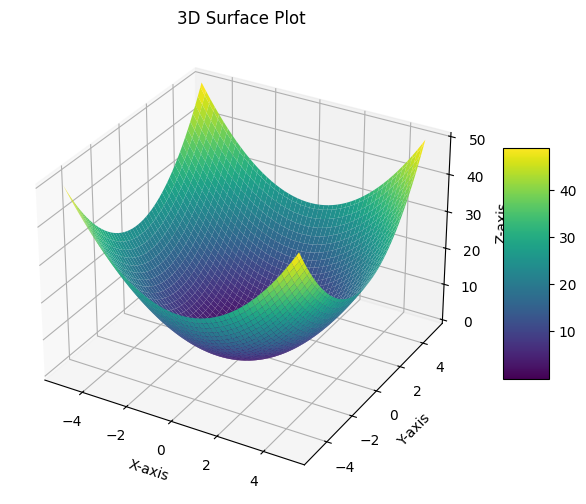

In [8]:
# chatGPT로 그래프화 하기

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Define the function
def function_3d(x, y):
    return x**2 + y**2


# Generate x and y data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = function_3d(X, Y)

# Plot the surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
surface = ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)

ax.set_title("3D Surface Plot")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

plt.show()

# 4.4 기울기




In [9]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    # print(grad)
    # print(x.size)
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # print(fxh1)
        
        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        # print(fxh2)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        # print(grad)
        x[idx] = tmp_val # 값 복원
        
    return grad


numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [10]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

numerical_diff(function_2, np.array([3,4]))

np.float64(14.000000000002899)

## 4.4.1 경사법(경사 하강법)

In [11]:
def gradient_descent(f, init_x, lr =0.01, step_num=100):
    # init_x = 초깃값, lr = 학습률, step_num = 반복 횟수
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x

In [12]:
# 문제: 경사법으로 f(x0, x1) = x0**2 + x1**2의 최솟값을 구하라

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
answer = gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)
print(answer)


[-6.11110793e-10  8.14814391e-10]


### 4.5.1 2층 신경망 클래스 구현하기

In [40]:
from common.functions import sigmoid, softmax, cross_entropy_error
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std* \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 테이블, t : 정답 테이블
    def loss(self, x, t):
        y = self.predict(x)
        # print("출력 테이블 y의 첫번째: ",y[0])
        # print("정답 테이블 t: ",t.shape)
        # print("출력데이터 y의 차원: ", y.ndim)
        

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 테이블, t : 정답 테이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}

        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
        
        return grads

### 4.5.2 미니배치 학습 구현하기

In [48]:
from dataset.mnist import MnistDataloader
from os.path import join

input_path = 'C:\\Users\\admin\\.cache\\kagglehub\\datasets\\hojjatk\\mnist-dataset\\versions\\1'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')


mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, t_train), (x_test, t_test) = mnist_dataloader.load_data()

def min_max_norm(arr):
    min_val = np.min(arr)
    max_val = np.max(arr)
    return (arr - min_val) / (max_val - min_val)

x_train = np.array(x_train).reshape(-1,784)
# x_train = np.array(x_train).reshape(-1,784)

t_train = np.array(t_train)
x_test = min_max_norm(np.array(x_test).reshape(-1, 784))
t_test = np.array(t_test)

## 데이터 정규화 비교 (교재에 없는 내용)

### 1) 데이터 정규화 안했을 때
### 2) min_max_norm으로 정규화 했을 때
### 3) 255.0으로 나누어서 정규화 했을 때


(array([38323274.,   264698.,   259887.,   204443.,   202529.,   164908.,
          182970.,   176223.,   154964.,   145302.,   163723.,   129004.,
          154504.,   145256.,   146884.,   194353.,   167926.,   140935.,
          153563.,   147069.,   168975.,   140903.,   202679.,   175141.,
          186001.,   183801.,   242058.,   246955.,   298070.,  3573002.]),
 array([  0. ,   8.5,  17. ,  25.5,  34. ,  42.5,  51. ,  59.5,  68. ,
         76.5,  85. ,  93.5, 102. , 110.5, 119. , 127.5, 136. , 144.5,
        153. , 161.5, 170. , 178.5, 187. , 195.5, 204. , 212.5, 221. ,
        229.5, 238. , 246.5, 255. ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Histogram of Data Distribution')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Frequency')

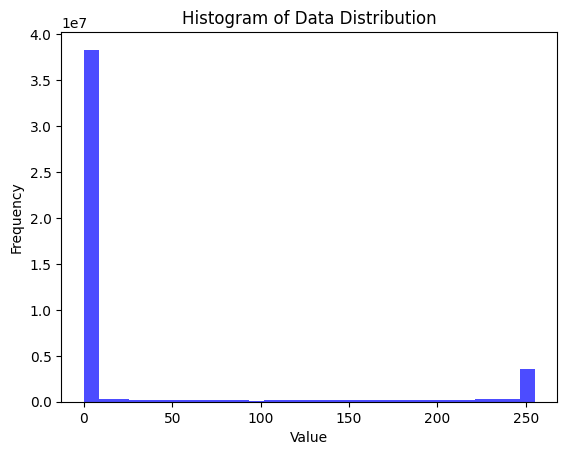

(array([38323274.,   264698.,   259887.,   204443.,   202529.,   164908.,
          182970.,   176223.,   154964.,   145302.,   163723.,   129004.,
          154504.,   145256.,   146884.,   194353.,   167926.,   140935.,
          153563.,   147069.,   168975.,   140903.,   202679.,   175141.,
          186001.,   183801.,   242058.,   246955.,   298070.,  3573002.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Histogram of Data Distribution')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Frequency')

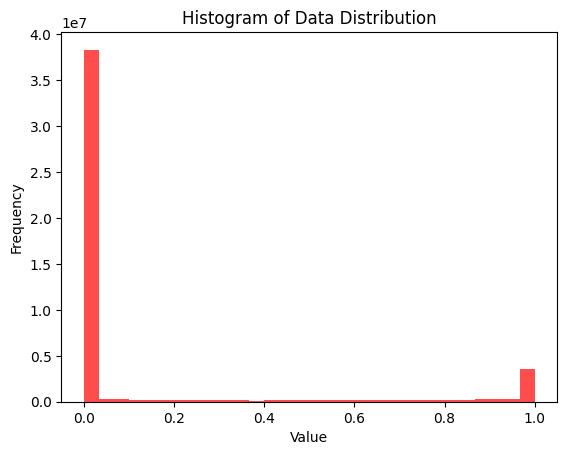

(array([38323274.,   264698.,   259887.,   204443.,   202529.,   164908.,
          182970.,   176223.,   154964.,   145302.,   163723.,   129004.,
          154504.,   145256.,   146884.,   194353.,   167926.,   140935.,
          153563.,   147069.,   168975.,   140903.,   202679.,   175141.,
          186001.,   183801.,   242058.,   246955.,   298070.,  3573002.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Histogram of Data Distribution')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Frequency')

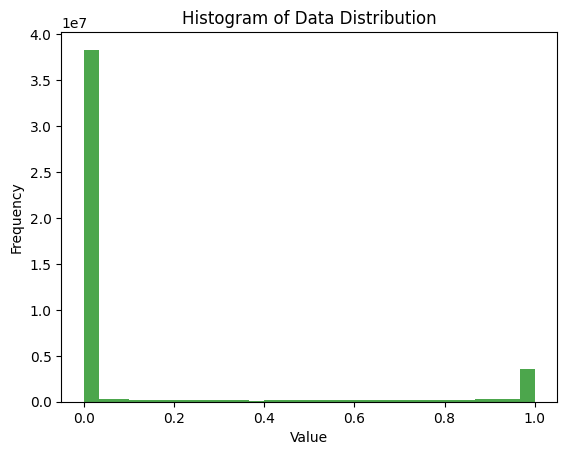

In [ ]:
import matplotlib.pyplot as plt

data = x_train.reshape(-1)
data_1 = min_max_norm(x_train.reshape(-1))
data_2 = x_train.reshape(-1)/255.0

# 히스토그램 그리기
plt.hist(data, bins=30, color='blue', alpha=0.7)

plt.title("Histogram of Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


plt.hist(data_1, bins=30, color='red', alpha=0.7)
plt.title("Histogram of Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()



plt.hist(data_2, bins=30, color='green', alpha=0.7)
plt.title("Histogram of Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### 의문점 발견 - 데이터를 min_max_norm했을 때 loss값이 제자리에 머물러 있는데, 왜 정규화 안했을 때는 loss값이 줄어들면서 학습이 될까요?

In [ ]:
train_loss_list = []


# 하이퍼파라미터
iters_num = 100
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    print("epoch: ",i)
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    print(x_batch.shape)
    t_batch = t_train[batch_mask]
    print(t_batch.shape)

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    print("loss: ",loss)
    train_loss_list.append(loss)

epoch:  0
(100, 784)
(100,)
loss:  2.259130655660497
epoch:  1
(100, 784)
(100,)
loss:  2.271567762406157
epoch:  2
(100, 784)
(100,)
loss:  2.2379431704501758
epoch:  3
(100, 784)
(100,)
loss:  2.2977351936303685
epoch:  4
(100, 784)
(100,)
loss:  2.2678976153315755
epoch:  5
(100, 784)
(100,)
loss:  2.2481274290578455
epoch:  6
(100, 784)
(100,)
loss:  2.2672518640664037
epoch:  7
(100, 784)
(100,)


KeyboardInterrupt: 